In [ ]:
! git clone https://github.com/WebClub-NITK/IntelChallenges

Cloning into 'IntelChallenges'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 7), reused 11 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 127.58 KiB | 1.88 MiB/s, done.
Resolving deltas: 100% (7/7), done.


#  Load Data

In [1]:
import pandas as pd
import numpy as np

from scipy.interpolate import Rbf

from random import randint

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/IntelChallenges/Challenge 1/function_data.csv')
data.shape

(1000, 13)

## EDA and Preprocessing:

In [ ]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,-250919.762305,-62973.414232,-1.497247,172.702994,5.719959e+06,-0.425458,5930.278163,1.077599,1.468509,413.578011,155502.450157,-2.068332e+06,3.965400e+09
1,901428.612820,8380.189476,-1.589779,296.681397,8.054323e+06,-0.106257,-13104.545516,1.373545,1.405838,25.360482,133101.652927,-4.241556e+06,7.112872e+07
2,463987.883623,74589.167175,2.552573,-249.532101,7.601609e+06,1.418190,14895.782534,2.662492,0.281933,224.910272,46884.651877,-1.748164e+06,5.564008e+09
3,197316.968394,46444.977282,-1.573648,124.874100,1.538999e+06,-0.639982,4524.649563,2.533537,1.852888,-63.951702,283996.668556,-3.268679e+06,2.157333e+09
4,-687962.719115,61312.229572,-1.432882,71.745983,1.492495e+06,1.478599,-13711.844658,1.701285,1.180097,130.034578,212143.288280,-4.712082e+06,3.758501e+09


In [ ]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,-19486.893360,1403.461036,0.015116,-9.624952,4.941053e+06,-0.006142,-267.646429,1.964741,1.024344,-3.205016,228130.457004,-2.221116e+06,3.413533e+09
std,584274.723895,58437.978681,1.826360,286.489344,2.868099e+06,1.156779,11589.345614,0.569829,0.536246,282.153233,157549.152921,1.628943e+06,3.013133e+09
min,-990735.953991,-99356.347279,-3.141520,-499.346609,3.072885e+02,-1.975265,-19942.866277,1.000482,0.100462,-499.947173,-49481.326610,-4.999132e+06,-6.428667e+05
25%,-528053.464823,-51785.145768,-1.499476,-258.099230,2.449740e+06,-1.002480,-10391.133486,1.471979,0.573829,-235.855872,88947.032127,-3.606092e+06,6.922756e+08
50%,-6385.246906,3746.781285,0.003857,-15.720716,4.945981e+06,-0.038389,-614.279030,1.967981,1.009532,-4.813204,228501.365210,-2.280515e+06,2.700142e+09
75%,488639.175951,52093.011470,1.627995,237.540811,7.399935e+06,0.959407,10258.573871,2.428933,1.460219,236.217234,366186.177066,-7.448786e+05,5.617510e+09
max,999435.346572,99882.745154,3.127901,499.557703,9.977494e+06,1.997401,19978.427242,2.997809,1.992424,499.505190,499820.262883,4.963432e+05,9.977487e+09


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'x4'}>],
       [<Axes: title={'center': 'x5'}>, <Axes: title={'center': 'x6'}>,
        <Axes: title={'center': 'x7'}>, <Axes: title={'center': 'x8'}>],
       [<Axes: title={'center': 'x9'}>, <Axes: title={'center': 'x10'}>,
        <Axes: title={'center': 'x11'}>, <Axes: title={'center': 'x12'}>],
       [<Axes: title={'center': 'y'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

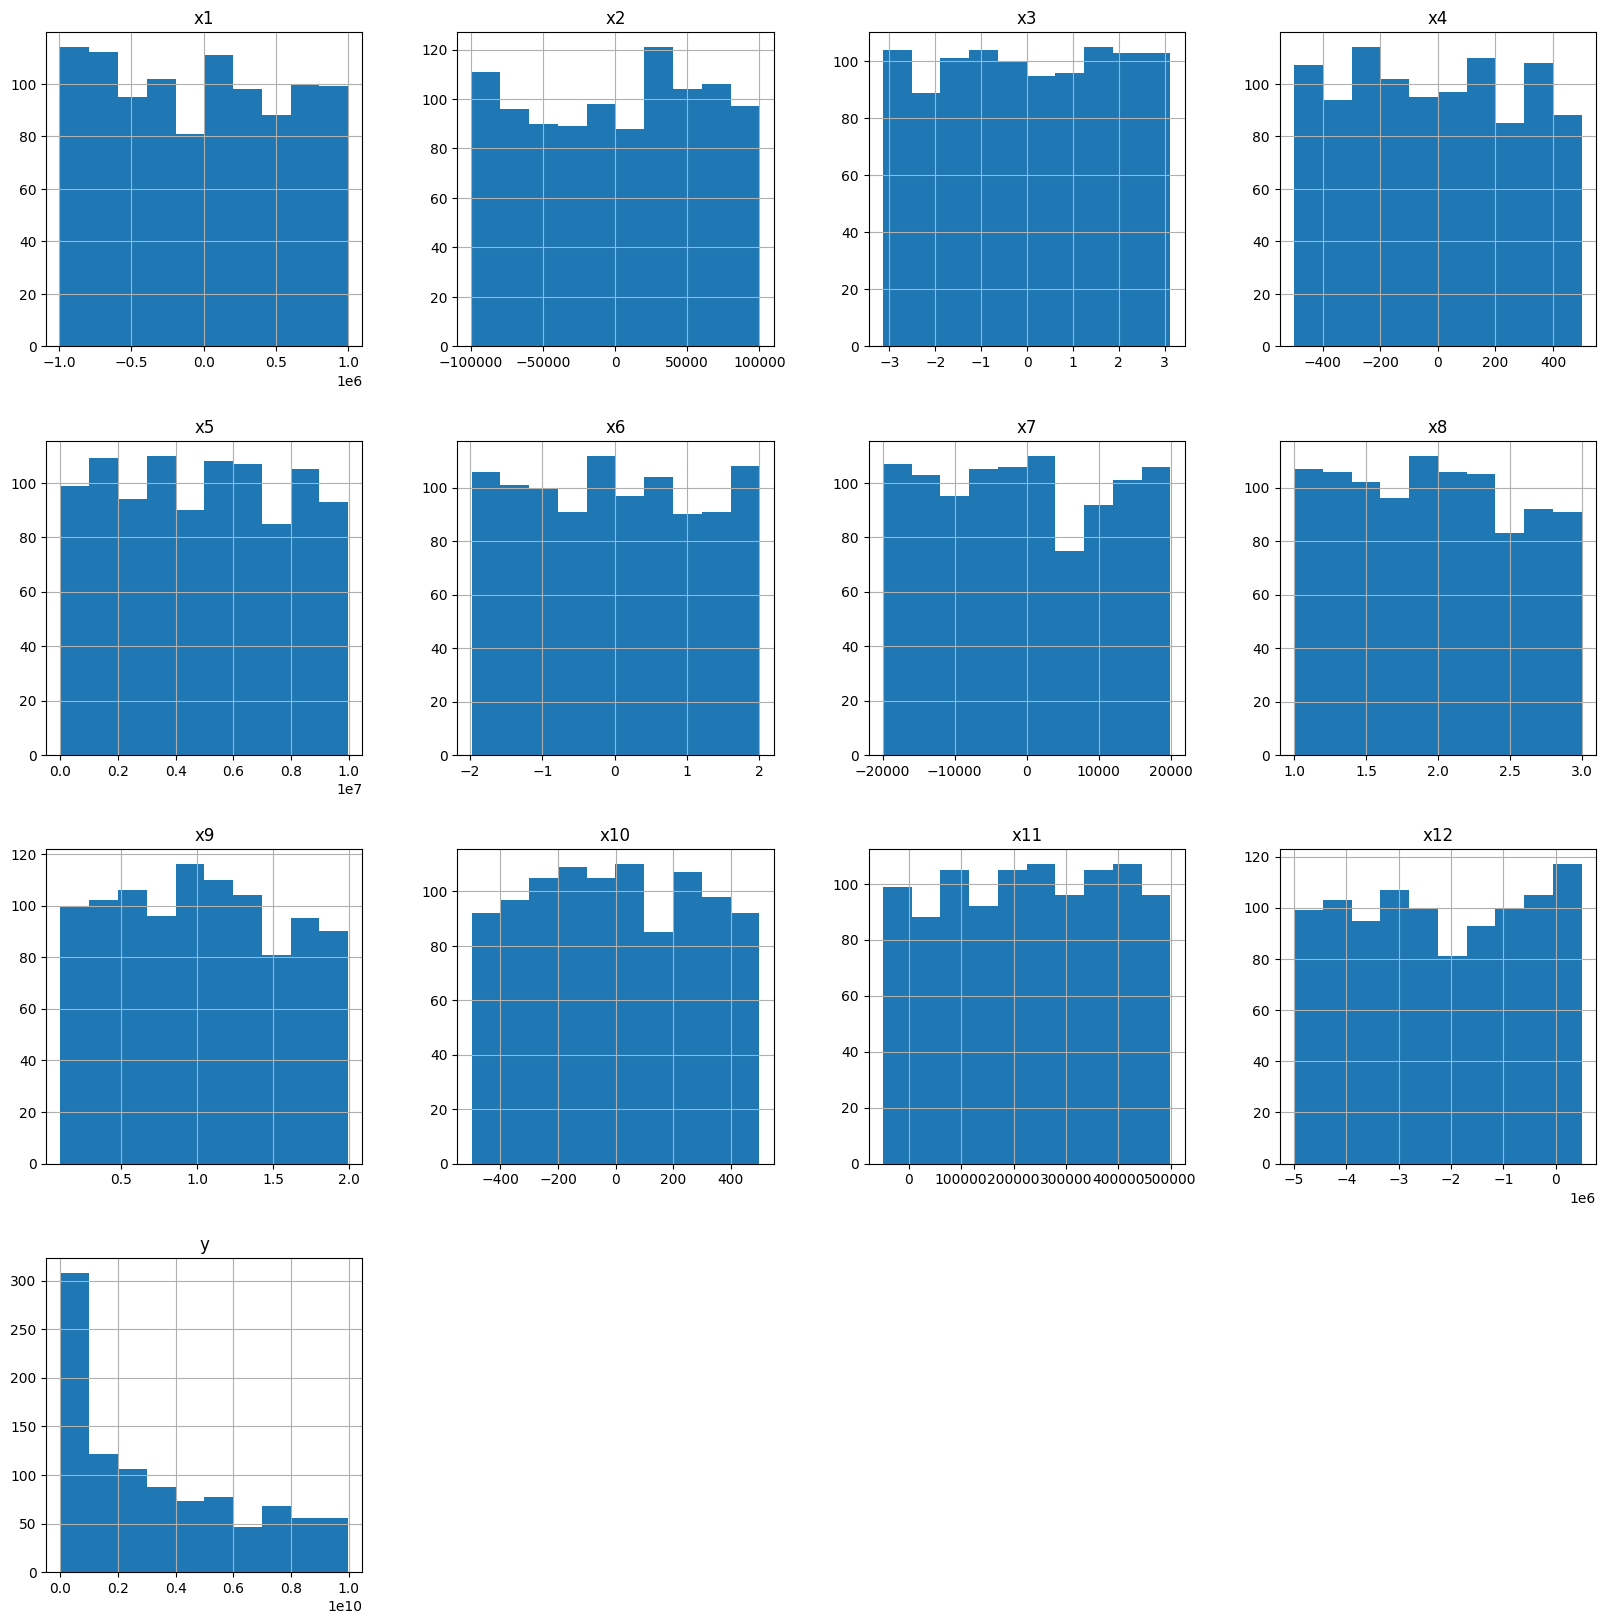

In [ ]:
data.hist(figsize=(20,20))

In [ ]:
data.corr()['y'].sort_values()

,y
x1,-0.034189
x4,-0.032870
x7,-0.032585
x5,-0.023311
x2,-0.012544
x12,-0.009435
x6,0.007011
x11,0.007429
x3,0.012006
x9,0.014915


# Optimization

In [ ]:
X=data.drop('y',axis=1)

In [ ]:
X_mean=X.mean().to_numpy()
X_std=X.std().to_numpy()

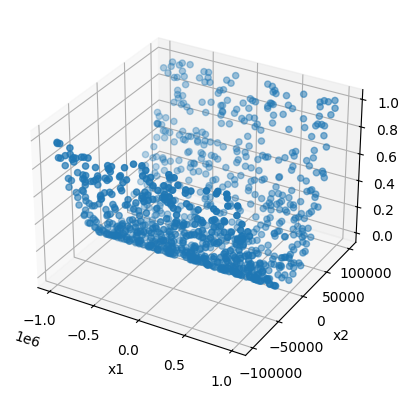

In [ ]:
# prompt: Plot x1,x2 and y of the original points in X in a 3D plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x1'], data['x2'], data.y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [ ]:
rbfi=Rbf(X['x1'],X['x2'],X['x3'],X['x4'],X['x5'],X['x6'],X['x7'],X['x8'],X['x9'],X['x10'],X['x11'],X['x12'],y,function='multiquadric')

In [ ]:
rbfi(*X.iloc[0])

array(3.96539982e+09)

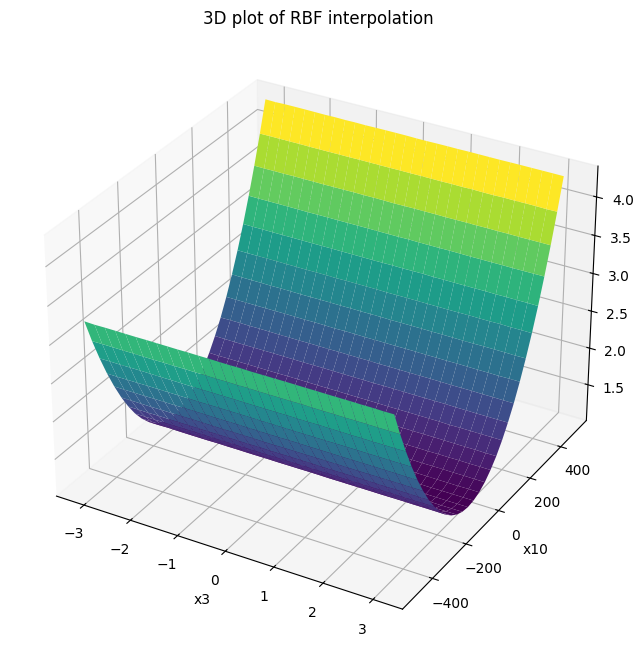

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

a='x3'
b='x10'



x1_plot = np.linspace(data[a].min(), data[a].max(), 30)
x2_plot = np.linspace(data[b].min(), data[b].max(), 30)
X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)

Z_plot = np.zeros((len(x2_plot), len(x1_plot)))


for i in range(len(x2_plot)):
  for j in range(len(x1_plot)):
    dummy_x = np.array([X1_plot[i,j],X2_plot[i,j]])

    for k in range(2, 12):
       dummy_x = np.append(dummy_x,X.iloc[:,k].mean())

    Z_plot[i, j] = rbfi(*dummy_x)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Z_plot, cmap='viridis')

ax.set_xlabel(a)
ax.set_ylabel(b)
ax.set_zlabel('y')
ax.set_title('3D plot of RBF interpolation')

plt.show()

In [ ]:
min_x=X.min(axis=0)
min_x

,0
x1,-1.662316
x2,-1.724218
x3,-1.728375
x4,-1.709389
x5,-1.722655
x6,-1.702246
x7,-1.697699
x8,-1.692191
x9,-1.722871
x10,-1.760540


In [ ]:
max_x=X.max(axis=0)
max_x

,0
x1,1.743909
x2,1.685193
x3,1.704366
x4,1.777318
x5,1.756020
x6,1.732001
x7,1.746956
x8,1.812945
x9,1.805293
x10,1.781692


In [ ]:
bounds=pd.DataFrame({'min':min_x,'max':max_x})
bounds

,min,max
x1,-1.662316,1.743909
x2,-1.724218,1.685193
x3,-1.728375,1.704366
x4,-1.709389,1.777318
x5,-1.722655,1.756020
x6,-1.702246,1.732001
x7,-1.697699,1.746956
x8,-1.692191,1.812945
x9,-1.722871,1.805293
x10,-1.760540,1.781692


In [ ]:
np.array(list(data.nsmallest(3,'y').to_numpy()[0:11])).shape

(3, 13)

In [ ]:
a=data.nsmallest(3,'y').to_numpy()
a[0]

array([-7.64497834e+05, -3.48863547e+02,  2.84139328e+00, -3.29063598e+02,
        7.62174590e+06, -1.04400928e+00, -8.20562967e+01,  1.71867798e+00,
        8.39606154e-01,  3.74505295e+02, -3.58060575e+04, -4.48612473e+06,
       -6.42866665e+05])

## GA Model

In [ ]:
class GA():
  def __init__(self,data,population_size=1000,rand_init_fraction=1,tournament_size=5,generation_retention=0,eta=10,mutation_fraction=0.05,mutation_std=0.2):

    # Hyperparameters
    self.pop_size=population_size
    self.rand_init_fraction=rand_init_fraction

    self.tourn_size=tournament_size

    self.generation_retention=generation_retention
    self.eta=eta

    self.mutation_fraction=mutation_fraction
    self.mutation_std=mutation_std

    # Interpolate
    self.interpolate(data)

    # Initialize generation
    self.init_pop(data)

    # Initialize logs
    self.average_fitness=[]
    self.variation_fitness=[]
    self.gene_var=[]

  def interpolate(self,data):
    X=data.drop('y',axis=1)
    y=data.y
    X=(X-X.mean())/X.std()
    self.rbfi=Rbf(X['x1'],X['x2'],X['x3'],X['x4'],X['x5'],X['x6'],X['x7'],X['x8'],X['x9'],X['x10'],X['x11'],X['x12'],y,function='multiquadric')

  def init_pop(self,data):
    generation=[]
    X_new=[]
    fitness_new=[]
    rand_init_count=int(self.rand_init_fraction*self.pop_size)

    smallest=data.nsmallest(self.pop_size-rand_init_count,'y').to_numpy()
    X_new=list(smallest[:,0:12])
    fitness_new=list(smallest[:,-1])

    for i in range(rand_init_count):
      x=[np.random.uniform(bounds.iloc[j,0],bounds.iloc[j,1]) for j in range(12)]
      X_new.append(x)
      fitness_new.append(self.fitness(x))

    fitness_new=np.array(fitness_new)
    self.generation=np.array(X_new)
    self.generation=np.concatenate([self.generation,fitness_new.reshape((-1,1))],axis=1)


  def fitness(self,X):
    return self.rbfi(*X)

  # Tournament selection
  def selection(self):
    selected=[]
    for i in range(self.pop_size):
      candidates_indices=np.random.choice(self.generation.shape[0],self.tourn_size,replace=False)
      candidates=self.generation[candidates_indices]
      selected.append(candidates[np.argmax(candidates[:,-1])])
    return np.array(selected)

  def replace(self,child):
    worst=0
    for i in range(self.pop_size):
      if self.generation[worst][-1]<self.generation[i][-1]:
        worst=i
    fitness=self.fitness(child)
    child=np.append(child,fitness)
    self.generation[worst]=child

  # SBX Crossover
  def crossover(self,selected):
    children_no=int((1-self.generation_retention)*self.pop_size)
    delta_max=(bounds['max']-bounds['min'])/(bounds['max']+bounds['min']+0.001)
    for i in range(0,children_no,2):
      parent_indices=np.random.choice(selected.shape[0],2,replace=False)
      parent1=selected[parent_indices[0]][0:12]
      parent2=selected[parent_indices[1]][0:12]

      delta=np.abs(parent1-parent2)

      beta_term=2/(1+delta/delta_max)
      beta_exp=1/(self.eta+1)
      beta=pow(beta_term,beta_exp)

      child1=0.5*(parent1+parent2)-0.5*beta*delta
      child2=0.5*(parent1+parent2)+0.5*beta*delta

      self.replace(child1)
      self.replace(child2)

  # Gaussian mutation
  def mutation(self):
    candidates_count=int(self.mutation_fraction*self.pop_size)
    candidate_indices=np.random.randint(0,self.pop_size,candidates_count)
    for i in candidate_indices:
      self.generation[i][0:12]=self.generation[i][0:12]+np.random.normal(size=(1,12),scale=self.mutation_std)
      self.generation[i][-1]=self.fitness(self.generation[i][0:12])

  def eval(self):
    average_fitness=self.generation[-1].mean()
    variation_fitness=self.generation[-1].var()
    gene_var=self.generation[0:12].var(axis=1)

    self.average_fitness.append(average_fitness)
    self.variation_fitness.append(variation_fitness)
    self.gene_var.append(gene_var)
    return average_fitness,variation_fitness,gene_var

  def fit(self,epochs):
      for epoch in range(1,epochs+1):
        selected=self.selection()
        self.crossover(selected)
        self.mutation()
        average_fitness,variation_fitness,gene_var=self.eval()

        print(f"Epoch [{epoch}/{epochs}]")
        print(f"Average fitness: {average_fitness}")
        print(f"Variation in fitness: {variation_fitness}")
        print(f"Variation in genes: {gene_var}")
        print()

In [ ]:
ga=GA(data)
ga.generation.shape

(1000, 13)

## Fitting:

In [ ]:
ga.fit(150)

Epoch [1/150]
Average fitness: 122222745.73310079
Variation in fitness: 1.7926079507693107e+17
Variation in genes: [1.18272635e+18 1.94800784e+18 2.23413197e+18 8.33928696e+15
 1.75323222e+16 1.38376264e+18 1.26033192e+18 2.26669824e+17
 2.02694374e+18 8.00421856e+16 2.78025202e+15 4.36812270e+17]

Epoch [2/150]
Average fitness: 122222745.73310079
Variation in fitness: 1.7926079507693107e+17
Variation in genes: [1.18272635e+18 6.20642708e+16 5.31016875e+17 8.33928696e+15
 1.75323222e+16 6.24866594e+17 1.26033192e+18 2.26669824e+17
 3.20927185e+17 8.00421856e+16 2.78025202e+15 4.36812270e+17]

Epoch [3/150]
Average fitness: 122222745.73310079
Variation in fitness: 1.7926079507693107e+17
Variation in genes: [7.69595634e+17 6.20642708e+16 5.31016875e+17 8.33928696e+15
 1.75323222e+16 6.24866594e+17 5.69374779e+17 2.26669824e+17
 3.20927185e+17 8.00421856e+16 2.78025202e+15 4.36812270e+17]

Epoch [4/150]
Average fitness: 122222745.73310079
Variation in fitness: 1.7926079507693107e+17
Varia

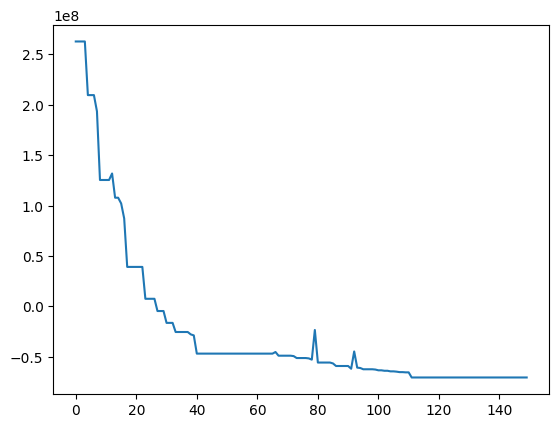

In [ ]:
plt.plot(ga.average_fitness)

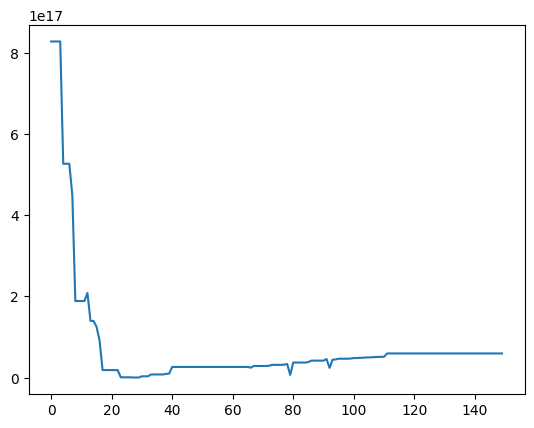

In [ ]:
plt.plot(ga.variation_fitness)

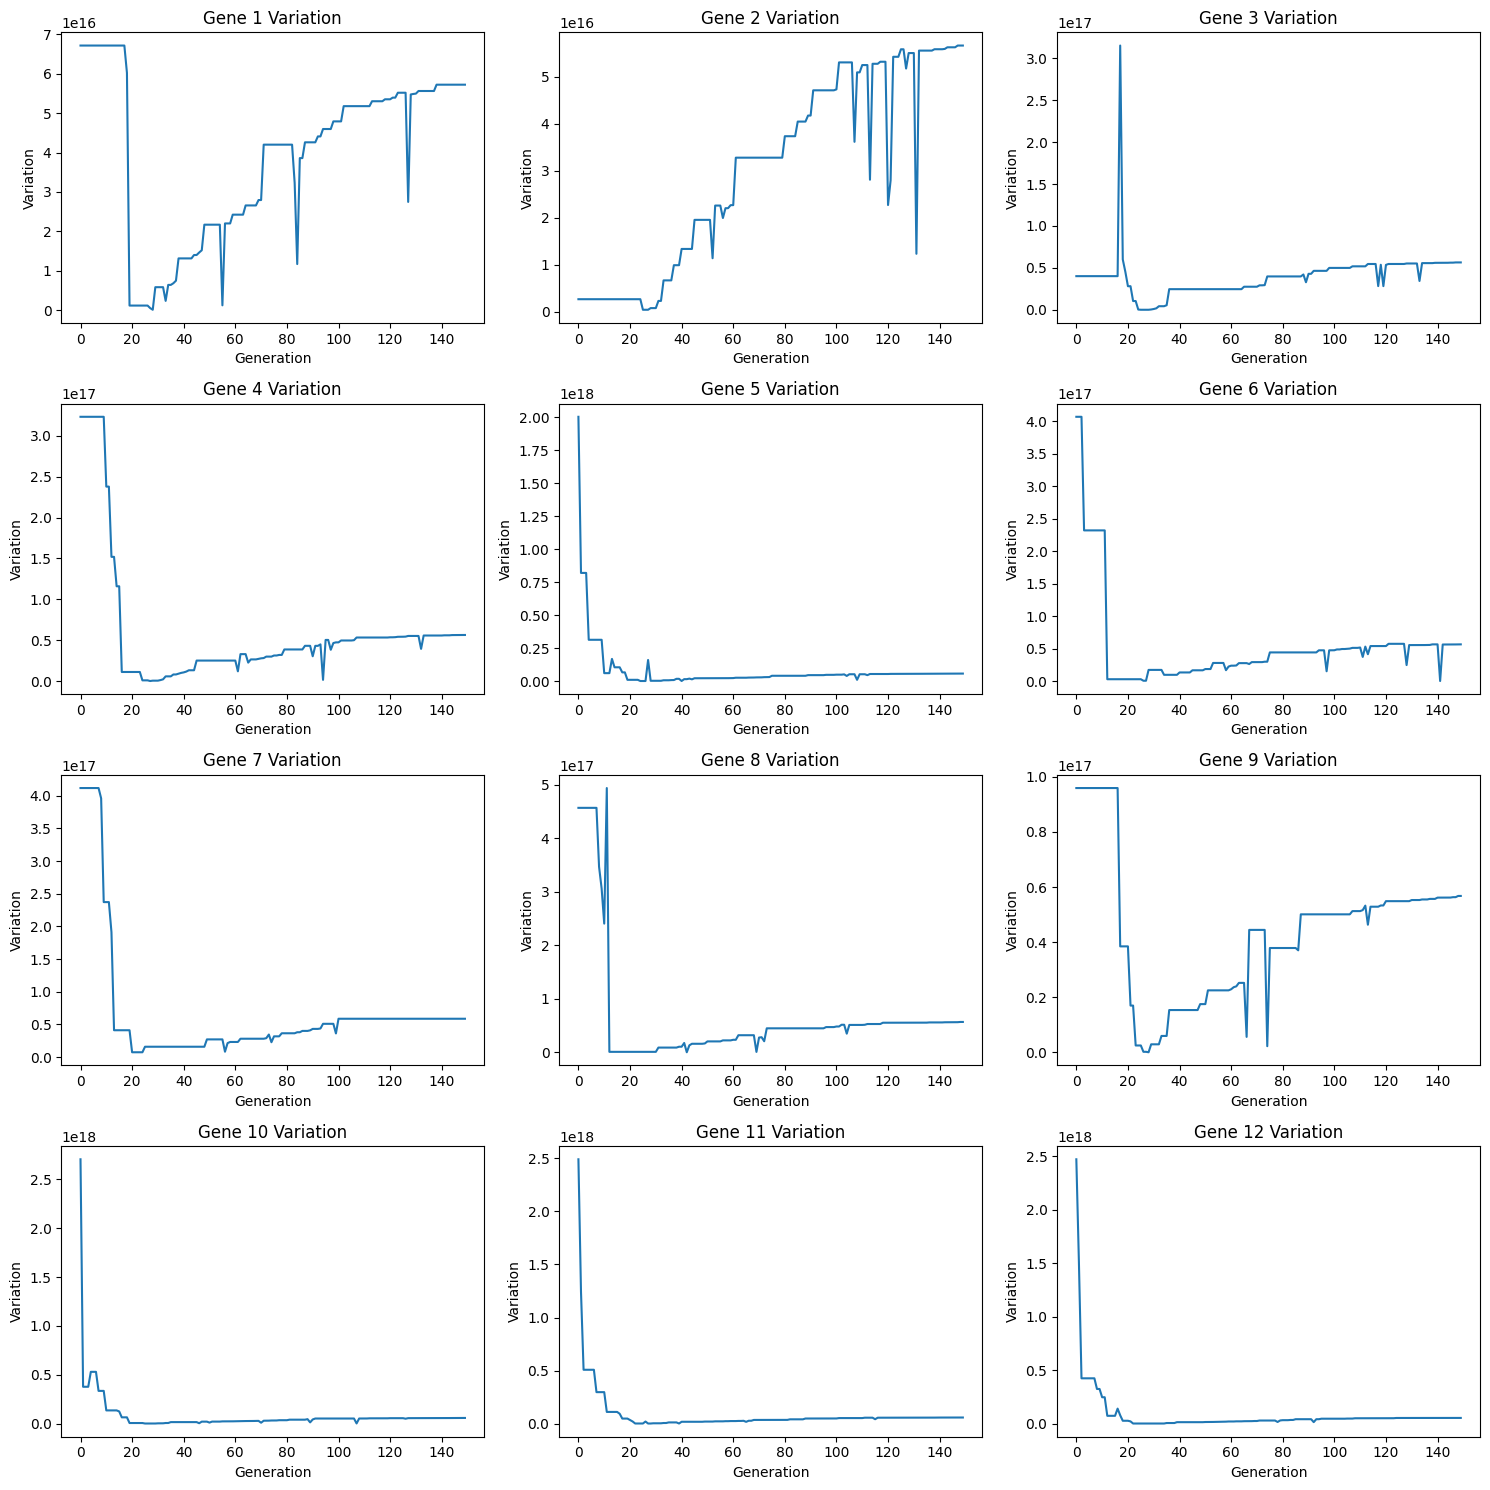

In [ ]:
num_genes = 12  # Number of genes
num_generations = len(ga.gene_var)

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() # Flatten the axes array for easier indexing

for i in range(num_genes):
    gene_variations = [generation[i] for generation in ga.gene_var]
    axes[i].plot(gene_variations)
    axes[i].set_title(f'Gene {i+1} Variation')
    axes[i].set_xlabel('Generation')
    axes[i].set_ylabel('Variation')

# Turn off any unused subplots
for j in range(num_genes, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Predictions:

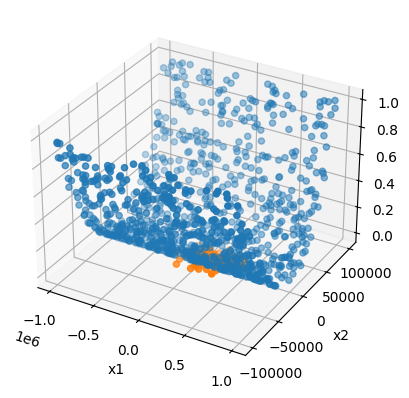

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

unscaled_generation=ga.generation[:,0:12]*X_std.reshape((1,12))+X_mean.reshape((1,12))

x = unscaled_generation[:, 0]
y = unscaled_generation[:, 1]
z = unscaled_generation[:, -1]

ax.scatter(data.x1,data.x2, data.y)
ax.scatter(x, y, z)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

In [ ]:
X_pred_mean=ga.generation[:,0:12].mean(axis=0)
X_pred_mean

array([ 0.84353389,  0.01066504,  1.03889252, -0.20108536,  0.03103455,
        0.94063276, -0.31626831,  0.1881475 , -0.02432682,  0.83019433,
        0.83825218,  0.34994413])

In [ ]:
ga.fitness(X_pred_mean)

array(-9.10296451e+08)

In [ ]:
X_pred_unscaled=X_pred_mean*X_std+X_mean
X_pred_unscaled

,0
x1,4.733686e+05
x2,2.026704e+03
x3,1.912507e+00
x4,-6.723376e+01
x5,5.030063e+06
x6,1.081962e+00
x7,-3.932989e+03
x8,2.071953e+00
x9,1.011299e+00
x10,2.310370e+02


In [ ]:
gen_minimum=ga.generation[:,-1].argmin()
X_gen_min=ga.generation[gen_minimum,0:12]
X_gen_min

array([ 0.83814043,  0.01122568,  1.06253824, -0.71514761,  0.28788178,
        0.6438168 , -0.25996639, -0.15655176, -0.39497123,  0.84018405,
        0.860369  ,  0.41789233])

In [ ]:
X_gen_min_unscaled=ga.generation[gen_minimum,0:12]*X_std+X_mean
X_gen_min_unscaled

,0
x1,4.702174e+05
x2,2.059467e+03
x3,1.955693e+00
x4,-2.145071e+02
x5,5.766727e+06
x6,7.386119e-01
x7,-3.280487e+03
x8,1.875534e+00
x9,8.125421e-01
x10,2.338556e+02


In [ ]:
ga.fitness(ga.generation[gen_minimum,0:12])

array(-9.66865241e+08)

# Explainable Representation of function

In [6]:
! pip install PySR

In [7]:
from pysr import PySRRegressor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Symbolic Regression Model

In [8]:
model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp", "log", "sin", "cos"],
)

In [9]:
X=data.drop('y',axis=1)
y=data.y

In [10]:
model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:2251: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, and consider using a larger `maxsize`.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 3.580e+04
Progress: 65 / 3100 total iterations (2.097%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.072e+19  1.594e+01  y = -1.787
3           3.414e+11  7.906e+00  y = x2 * x2
5           1.341e+05  7.242e+00  y = x1 + (x2 * x2)
7           1.339e+05  9.699e-04  y = (x2 * x2) + (x1 + 0.68421)
9           1.335e+05  1.443e-03  y = (x2 * x2) + ((1.2448 + x1) - -0.51833)
12          1.333e+05  4.497e-04  y = (x2 * x2) + ((cos(x7 / x2) + x1) + 0.68421)
14          1.331e+05  8.360e-04  y = ((x1 + (x10 / x7)) + sin(x7)) + ((x2 * x2) - x3)
16          1.328e+05  1.042e-03  y = (x2 * x2) + ((x1 + cos(x7 / (x2 + x2))) + (x7 * 0.0007...
                                      1806))
─────────────────────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.069e+19  1.594e+01  y = x5
3           3.414e+11  7.906e+00  y = x2 * x2
5           1.341e+05  7.242e+00  y = x1 + (x2 * x2)
7           1.310e+05  1.194e-02  y = (x2 * x2) + (x1 / 1)
9           1.308e+05  4.750e-04  y = (x2 * x2) + ((x1 / 1) + 3.5287)
10          1.283e+05  2.003e-02  y = ((log(x9) * -30.918) + x1) + (x2 * x2)
11          1.144e+05  1.144e-01  y = (x1 - ((x4 * -0.26782) * x3)) + (x2 * x2)
12          9.973e+04  1.371e-01  y = (x1 - (-48.189 - (x4 * sin(x3)))) + (x2 * x2)
13          9.808e+04  1.676e-02  y = (x2 * x2) + (x1 - (-48.02 - (sin(sin(x3)) * x4)))
14          9.765e+04  4.311e-03  y = ((x2 * x2) + (x1 + ((sin(x3) * x4) - -150.16))) - 128....
                                      7
16          9.765e+04  3.248e-06  y = (((x2 * x2) + ((x1 + (sin(x3) * x4)) - -150.16)) - 128...
                           

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x5   
	1         8.959869                                            x2 * x2   
	2   >>>>  7.374881                                     x1 + (x2 * x2)   
	3         0.011942                       (x2 * x2) + (x1 / 1.0000323)   
	4         0.000475         (x2 * x2) + ((x1 / 1.0000248) + 3.5286593)   
	5         0.020034          ((log(x9) * -30.917631) + x1) + (x2 * x2)   
	6         0.114384       (x1 - ((x4 * -0.26781803) * x3)) + (x2 * x2)   
	7         0.137109    (x1 - (-48.18922 - (x4 * sin(x3)))) + (x2 * x2)   
	8         0.016764  (x2 * x2) + (x1 - (-48.019962 - (sin(sin(x3)) ...   
	9         0.004312  ((x2 * x2) + (x1 + ((sin(x3) * x4) - -150.1571...   
	10        0.000003  (((x2 * x2) + ((x1 + (sin(x3) * x4)) - -150.15...   
	11        0.000024  ((x1 - x9) - (((1.1701632 - x4) * sin(x3)) - 1...   
	12        0.010112  ((x2 * x2) - 128.70439) + ((x1 - x9) - (((exp(...   
	13        0.018160  (x2 * x2) + ((x1 + 62.983326) - (sin(x3) * ((x...   
	14        0.000202  ((x2 * x2) + (x1 + (62.983326 - ((x4 * (cos((x...   
	15        0.013471  (x2 * x2) + ((x1 + 69.88291) - (((cos(x6 * sin...   
	16        0.000913  (x2 * x2) + ((x1 + (69.88291 - (cos(x6 * sin(-...   
	17        0.003846  (x2 * x2) + ((x1 + 65.28492) - (((cos(x6 * sin...   
	18        0.000061  ((x2 * x2) + ((x1 - (sin(x3) * (((cos(x6 * sin...   
	
	            loss  complexity  
	0   2.068880e+19           1  
	1   3.414222e+11           3  
	2   1.341378e+05           5  
	3   1.309721e+05           7  
	4   1.308477e+05           9  
	5   1.282523e+05          10  
	6   1.143902e+05          11  
	7   9.973401e+04          12  
	8   9.807605e+04          13  
	9   9.765410e+04          14  
	10  9.765345e+04          16  
	11  9.764877e+04          18  
	12  9.666630e+04          19  
	13  9.321843e+04          21  
	14  9.318085e+04          23  
	15  9.193406e+04          24  
	16  9.176635e+04          26  
	17  9.106328e+04          28  
	18  9.105223e+04          30  
]

  - outputs/20250101_150215_wsWoOT/hall_of_fame.csv


In [11]:
equations=model.equations_
equations.head()

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,2.068880e+19,x5,0.000000,x5,PySRFunction(X=>x5)
1,3,3.414222e+11,x2 * x2,8.959869,x2*x2,PySRFunction(X=>x2*x2)
2,5,1.341378e+05,x1 + (x2 * x2),7.374881,x1 + x2*x2,PySRFunction(X=>x1 + x2*x2)
3,7,1.309721e+05,(x2 * x2) + (x1 / 1.0000323),0.011942,x1/1.0000323 + x2*x2,PySRFunction(X=>x1/1.0000323 + x2*x2)
4,9,1.308477e+05,(x2 * x2) + ((x1 / 1.0000248) + 3.5286593),0.000475,x1/1.0000248 + x2*x2 + 3.5286593,PySRFunction(X=>x1/1.0000248 + x2*x2 + 3.5286593)


In [12]:
equations.sort_values('score',ascending=False)

,complexity,loss,equation,score,sympy_format,lambda_format
1,3,3.414222e+11,x2 * x2,8.959869,x2*x2,PySRFunction(X=>x2*x2)
2,5,1.341378e+05,x1 + (x2 * x2),7.374881,x1 + x2*x2,PySRFunction(X=>x1 + x2*x2)
7,12,9.973401e+04,(x1 - (-48.18922 - (x4 * sin(x3)))) + (x2 * x2),0.137109,x1 + x2*x2 - (-x4*sin(x3) - 48.18922),PySRFunction(X=>x1 + x2*x2 - (-x4*sin(x3) - 48...
6,11,1.143902e+05,(x1 - ((x4 * -0.26781803) * x3)) + (x2 * x2),0.114384,x1 + x2*x2 - (-0.26781803)*x3*x4,PySRFunction(X=>x1 + x2*x2 - (-0.26781803)*x3*x4)
5,10,1.282523e+05,((log(x9) * -30.917631) + x1) + (x2 * x2),0.020034,x1 + x2**2 - 30.917631*log(x9),PySRFunction(X=>x1 + x2**2 - 30.917631*log(x9))
13,21,9.321843e+04,(x2 * x2) + ((x1 + 62.983326) - (sin(x3) * ((x...,0.018160,x1 + x2*x2 - (-0.9521382)*x4*sin(x3)*cos(x6*(-...,PySRFunction(X=>x1 + x2*x2 - (-0.9521382)*x4*s...
8,13,9.807605e+04,(x2 * x2) + (x1 - (-48.019962 - (sin(sin(x3)) ...,0.016764,x1 + x2*x2 - (-x4*sin(sin(x3)) - 48.019962),PySRFunction(X=>x1 + x2*x2 - (-x4*sin(sin(x3))...
15,24,9.193406e+04,(x2 * x2) + ((x1 + 69.88291) - (((cos(x6 * sin...,0.013471,x1 + x2*x2 - (-12.132514)*x4*sin(x3)*cos(x6*si...,PySRFunction(X=>x1 + x2*x2 - (-12.132514)*x4*s...
3,7,1.309721e+05,(x2 * x2) + (x1 / 1.0000323),0.011942,x1/1.0000323 + x2*x2,PySRFunction(X=>x1/1.0000323 + x2*x2)
12,19,9.666630e+04,((x2 * x2) - 128.70439) + ((x1 - x9) - (((exp(...,0.010112,x1 + x2*x2 - x9 - ((-x4 + exp(x3))*sin(x3) - 1...,PySRFunction(X=>x1 + x2*x2 - x9 - ((-x4 + exp(...


In [13]:
equations.sort_values('loss',ascending=True)

,complexity,loss,equation,score,sympy_format,lambda_format
18,30,9.105223e+04,((x2 * x2) + ((x1 - (sin(x3) * (((cos(x6 * sin...,0.000061,x1 + x2*x2 - (-14.654821)*x4*sin(x3)*cos(x6*si...,PySRFunction(X=>x1 + x2*x2 - (-14.654821)*x4*s...
17,28,9.106328e+04,(x2 * x2) + ((x1 + 65.28492) - (((cos(x6 * sin...,0.003846,x1 + x2*x2 - (-14.654399)*x4*sin(x3)*cos(x6*si...,PySRFunction(X=>x1 + x2*x2 - (-14.654399)*x4*s...
16,26,9.176635e+04,(x2 * x2) + ((x1 + (69.88291 - (cos(x6 * sin(-...,0.000913,x1 + x2*x2 - (-12.132514)*x4*sin(x3)*cos(x6*si...,PySRFunction(X=>x1 + x2*x2 - (-12.132514)*x4*s...
15,24,9.193406e+04,(x2 * x2) + ((x1 + 69.88291) - (((cos(x6 * sin...,0.013471,x1 + x2*x2 - (-12.132514)*x4*sin(x3)*cos(x6*si...,PySRFunction(X=>x1 + x2*x2 - (-12.132514)*x4*s...
14,23,9.318085e+04,((x2 * x2) + (x1 + (62.983326 - ((x4 * (cos((x...,0.000202,x1 + x2*x2 - (-0.9521382)*x4*sin(x3)*cos(x6*(-...,PySRFunction(X=>x1 + x2*x2 - (-0.9521382)*x4*s...
13,21,9.321843e+04,(x2 * x2) + ((x1 + 62.983326) - (sin(x3) * ((x...,0.018160,x1 + x2*x2 - (-0.9521382)*x4*sin(x3)*cos(x6*(-...,PySRFunction(X=>x1 + x2*x2 - (-0.9521382)*x4*s...
12,19,9.666630e+04,((x2 * x2) - 128.70439) + ((x1 - x9) - (((exp(...,0.010112,x1 + x2*x2 - x9 - ((-x4 + exp(x3))*sin(x3) - 1...,PySRFunction(X=>x1 + x2*x2 - x9 - ((-x4 + exp(...
11,18,9.764877e+04,((x1 - x9) - (((1.1701632 - x4) * sin(x3)) - 1...,0.000024,x1 + x2*x2 - x9 - ((1.1701632 - x4)*sin(x3) - ...,PySRFunction(X=>x1 + x2*x2 - x9 - ((1.1701632 ...
10,16,9.765345e+04,(((x2 * x2) + ((x1 + (sin(x3) * x4)) - -150.15...,0.000003,x1 + x2*x2 + x4*sin(x3) - 1*128.70439 - 1.4303...,PySRFunction(X=>x1 + x2*x2 + x4*sin(x3) - 1*12...
9,14,9.765410e+04,((x2 * x2) + (x1 + ((sin(x3) * x4) - -150.1571...,0.004312,x1 + x2*x2 + x4*sin(x3) - 1*128.70439 - 1*(-15...,PySRFunction(X=>x1 + x2*x2 + x4*sin(x3) - 1*12...


## Top 5 equations ordered based on loss:

In [27]:
for i in equations.sort_values('loss',ascending=True).head().iterrows():
  print(i[0],i[1]['equation'],sep='\t')


18	((x2 * x2) + ((x1 - (sin(x3) * (((cos(x6 * sin(((-0.25305232 / x9) * x6) / x3)) * x4) / 15.081699) * -14.654821))) + 65.28483)) - x8
17	(x2 * x2) + ((x1 + 65.28492) - (((cos(x6 * sin((x6 * (-0.25276455 / x9)) / x3)) * -14.654399) * sin(x3)) * (x4 / 15.08211)))
16	(x2 * x2) + ((x1 + (69.88291 - (cos(x6 * sin(-0.23196074 / x9)) * (((-12.132514 * sin(x3)) * x4) / 12.390825)))) - x9)
15	(x2 * x2) + ((x1 + 69.88291) - (((cos(x6 * sin(-0.23196074 / x9)) * (-12.132514 * sin(x3))) * x4) / 12.390825))
14	((x2 * x2) + (x1 + (62.983326 - ((x4 * (cos((x6 / x9) * -0.19513215) * -0.9521382)) * sin(x3))))) + -3.8370914


## Top 5 equations based on score:

In [26]:
for i in equations.sort_values('score',ascending=False).head().iterrows():
  print(i[0],i[1]['equation'],sep='\t')


1	x2 * x2
2	x1 + (x2 * x2)
7	(x1 - (-48.18922 - (x4 * sin(x3)))) + (x2 * x2)
6	(x1 - ((x4 * -0.26781803) * x3)) + (x2 * x2)
5	((log(x9) * -30.917631) + x1) + (x2 * x2)
